In [ ]:
!pip install keras-tuner

Requied Libraries

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch, HyperParameters
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


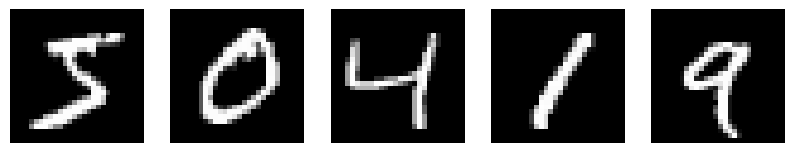

In [12]:
#  Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Visualizing some samples
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()


In [13]:

# Define model builder
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0.0, 0.5, step=0.1)))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [0.001, 0.0001])),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:



# Hyperparameter tuning with Random Search
tuner = RandomSearch(
    build_model, objective='val_accuracy', max_trials=5, executions_per_trial=1, directory='hyper_tuning')

tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Retrieve best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units: {best_hps.get('units')}, Best dropout: {best_hps.get('dropout')}, Best LR: {best_hps.get('learning_rate')}")

Reloading Tuner from hyper_tuning/untitled_project/tuner0.json
Best units: 160, Best dropout: 0.4, Best LR: 0.001


In [15]:
# Train the model with best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate on test data
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8443 - loss: 0.5195 - val_accuracy: 0.9569 - val_loss: 0.1429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9449 - loss: 0.1817 - val_accuracy: 0.9688 - val_loss: 0.1070
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9582 - loss: 0.1388 - val_accuracy: 0.9718 - val_loss: 0.0927
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9658 - loss: 0.1108 - val_accuracy: 0.9755 - val_loss: 0.0847
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9671 - loss: 0.1039 - val_accuracy: 0.9774 - val_loss: 0.0773
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9733 - loss: 0.0867 - val_accuracy: 0.9771 - val_loss: 0.0735
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9734 - loss: 0.0822 - val_accuracy: 0.9781 - val_loss: 0.0757
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9747 - loss: 0.0818

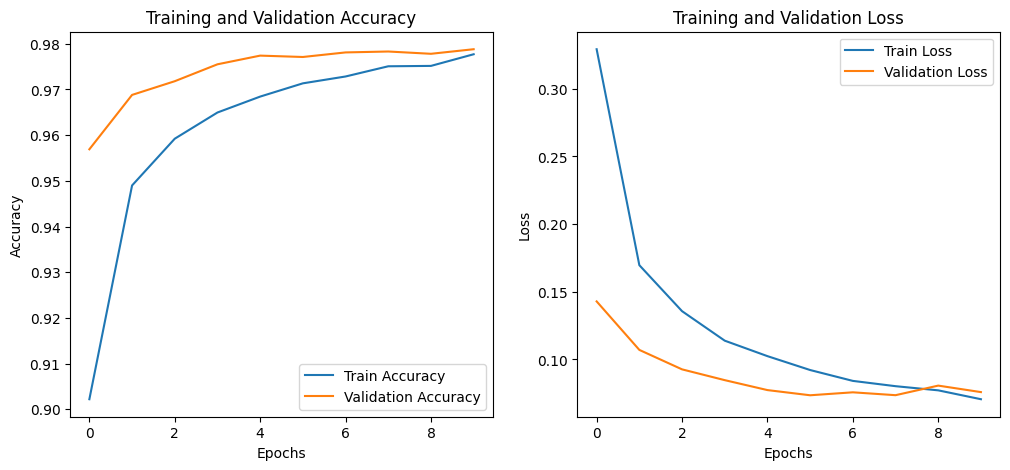

In [16]:

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


CODE FOR PLOTS USED IN PDF-Hyperparameter Concept

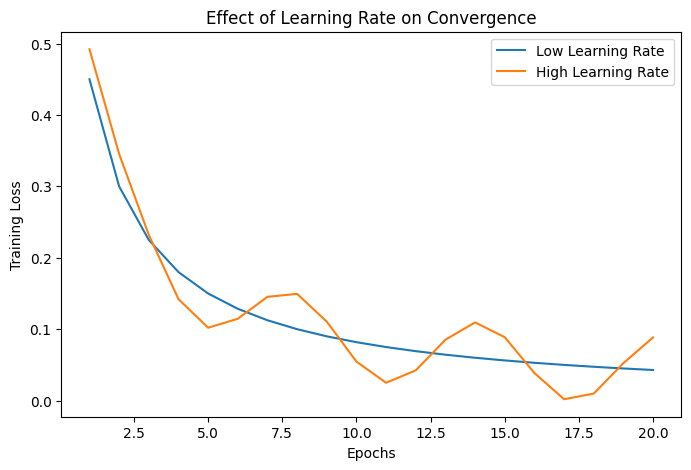

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Example: Learning Rate Tuning
epochs = np.arange(1, 21)
loss_low_lr = [0.9 / (epoch + 1) for epoch in epochs]
loss_high_lr = [0.9 / (epoch + 1) + (0.05 * np.sin(epoch)) for epoch in epochs]

plt.figure(figsize=(8, 5))
plt.plot(epochs, loss_low_lr, label="Low Learning Rate")
plt.plot(epochs, loss_high_lr, label="High Learning Rate")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Effect of Learning Rate on Convergence")
plt.legend()
plt.show()


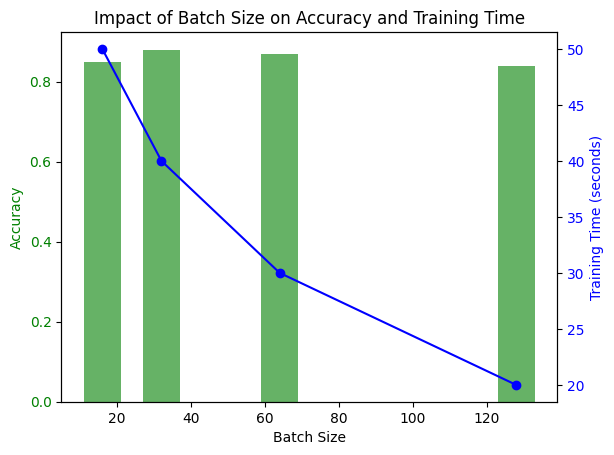

In [20]:
import matplotlib.pyplot as plt

# Example data
batch_sizes = [16, 32, 64, 128]
accuracy = [0.85, 0.88, 0.87, 0.84]  # Hypothetical accuracies
training_time = [50, 40, 30, 20]      # Hypothetical training times in seconds

# Create a bar chart
fig, ax1 = plt.subplots()

# Create twin axes
ax2 = ax1.twinx()

# Plot accuracy
ax1.bar(batch_sizes, accuracy, color='g', alpha=0.6, width=10, label='Accuracy')
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Accuracy', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Plot training time
ax2.plot(batch_sizes, training_time, color='b', marker='o', label='Training Time')
ax2.set_ylabel('Training Time (seconds)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Impact of Batch Size on Accuracy and Training Time')
plt.show()


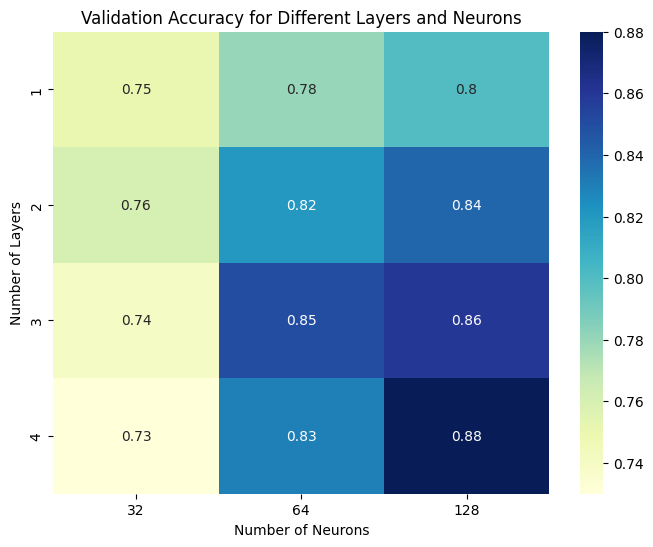

In [21]:
import seaborn as sns
import numpy as np

# Example data: validation accuracies for different configurations
layers = [1, 2, 3, 4]
neurons = [32, 64, 128]
accuracy_matrix = np.array([[0.75, 0.78, 0.80],
                             [0.76, 0.82, 0.84],
                             [0.74, 0.85, 0.86],
                             [0.73, 0.83, 0.88]])

plt.figure(figsize=(8, 6))
sns.heatmap(accuracy_matrix, annot=True, cmap="YlGnBu", xticklabels=neurons, yticklabels=layers)
plt.title('Validation Accuracy for Different Layers and Neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Number of Layers')
plt.show()


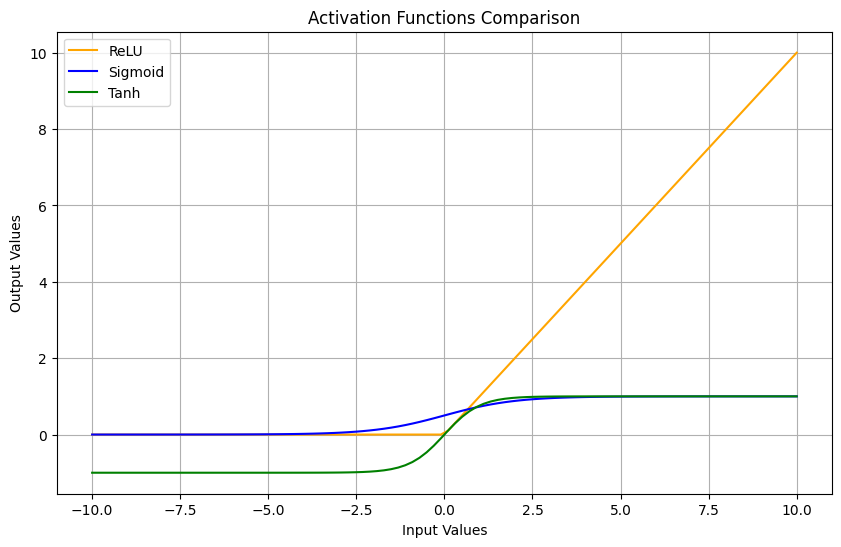

In [19]:
# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

x_values = np.linspace(-10, 10, 100)
relu_values = relu(x_values)
sigmoid_values = sigmoid(x_values)
tanh_values = tanh(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, relu_values, label='ReLU', color='orange')
plt.plot(x_values, sigmoid_values, label='Sigmoid', color='blue')
plt.plot(x_values, tanh_values, label='Tanh', color='green')
plt.title('Activation Functions Comparison')
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.legend()
plt.grid()
plt.show()


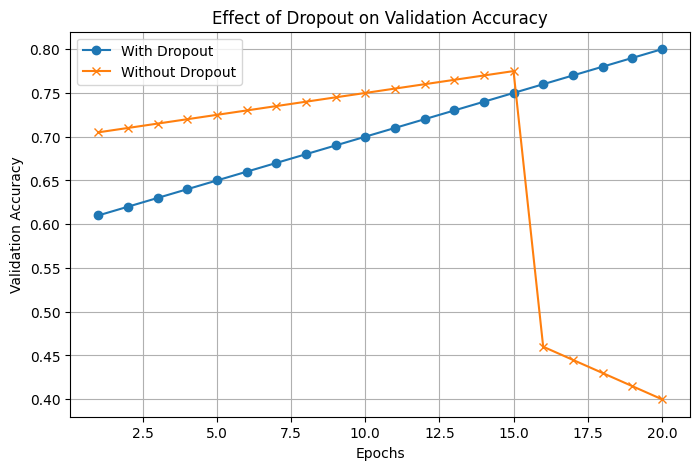

In [22]:
epochs = np.arange(1, 21)
accuracy_with_dropout = [0.6 + (epoch * 0.01) for epoch in epochs]
accuracy_without_dropout = [0.7 + (epoch * 0.005) - (epoch * (epoch > 15) * 0.02) for epoch in epochs]

plt.figure(figsize=(8, 5))
plt.plot(epochs, accuracy_with_dropout, label="With Dropout", marker='o')
plt.plot(epochs, accuracy_without_dropout, label="Without Dropout", marker='x')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Effect of Dropout on Validation Accuracy")
plt.legend()
plt.grid()
plt.show()


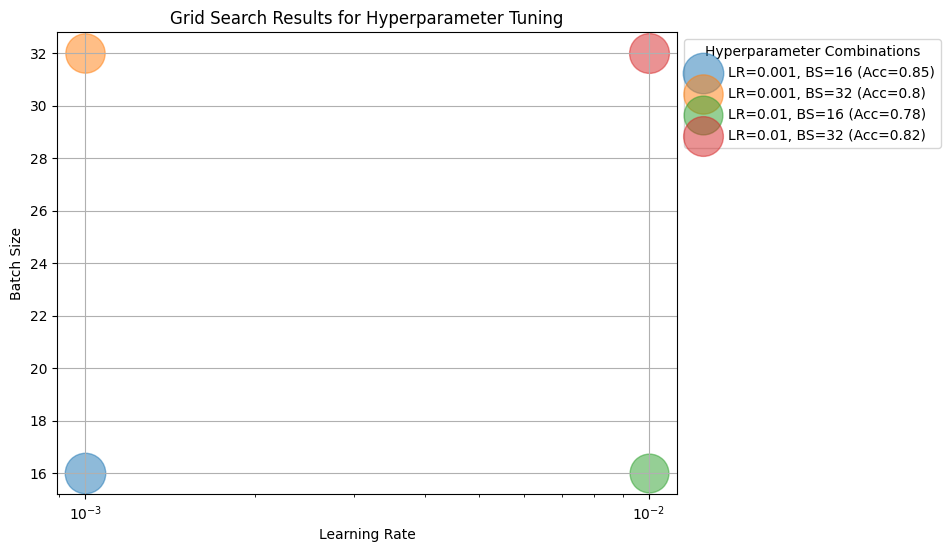

In [23]:
import matplotlib.pyplot as plt

# Example data for grid search results
learning_rates = [0.001, 0.01]
batch_sizes = [16, 32]
accuracy_grid = [[0.85, 0.80], [0.78, 0.82]]

fig = plt.figure(figsize=(8,6))
for i in range(len(learning_rates)):
    for j in range(len(batch_sizes)):
        plt.scatter(learning_rates[i], batch_sizes[j], s=accuracy_grid[i][j]*1000,
                    alpha=0.5,
                    label=f'LR={learning_rates[i]}, BS={batch_sizes[j]} (Acc={accuracy_grid[i][j]})')

plt.title('Grid Search Results for Hyperparameter Tuning')
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.xscale('log') # Log scale for better visualization
plt.legend(loc='upper left', bbox_to_anchor=(1.,1.), title="Hyperparameter Combinations")
plt.grid()
plt.show()


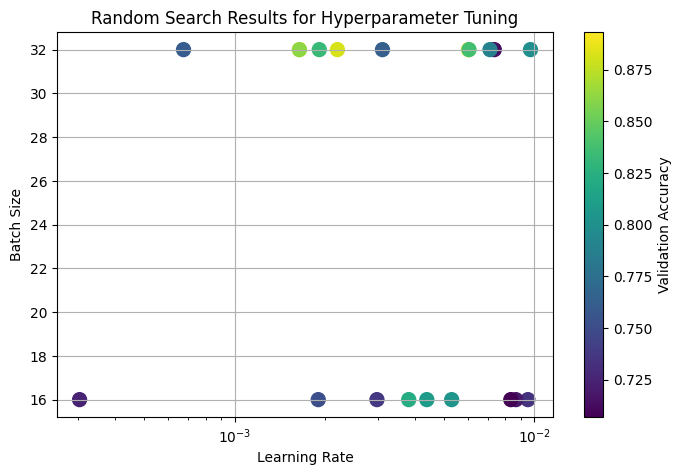

In [24]:
# Example data for random search results
np.random.seed(42)
learning_rates_random = np.random.uniform(0.0001, 0.01, size=20)
batch_sizes_random = np.random.choice([16, 32], size=20)
accuracies_random = np.random.uniform(0.7, 0.9, size=20)

plt.figure(figsize=(8,5))
plt.scatter(learning_rates_random, batch_sizes_random,
            c=accuracies_random,
            cmap='viridis', s=100)
cbar = plt.colorbar()
cbar.set_label('Validation Accuracy')

plt.title('Random Search Results for Hyperparameter Tuning')
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.xscale('log') # Log scale for better visualization
plt.grid()
plt.show()


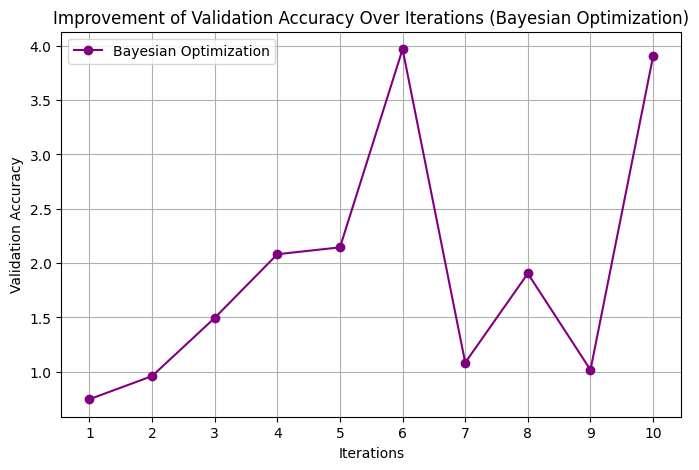

In [25]:
iterations = np.arange(1, 11)
validation_accuracy_bayesian = [0.65 + (i * (np.random.rand() * (i / max(iterations)))) for i in iterations]

plt.figure(figsize=(8,5))
plt.plot(iterations, validation_accuracy_bayesian,
         marker='o', linestyle='-', color='purple',
         label="Bayesian Optimization")

plt.title('Improvement of Validation Accuracy Over Iterations (Bayesian Optimization)')
plt.xlabel('Iterations')
plt.ylabel('Validation Accuracy')
plt.xticks(iterations)
plt.grid()
plt.legend()
plt.show()
